In [1]:
from graphnet.datasets import TRIDENTSmall
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTNodeDefinition import TRIDENTNodeDefinition

graph_definition = TRIDENTGraphDefinition(node_definition=TRIDENTNodeDefinition())

dataset =  TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = './datasets',
                    train_dataloader_kwargs = {
                        'batch_size': 500,
                        'num_workers': 2,
                        },
                    backend = 'sqlite')

graphnet [MainProcess] WARNING  2024-09-27 20:02:54 - has_icecube_package - `icecube` not available. Some functionality may be missing.
graphnet [MainProcess] INFO     2024-09-27 20:03:01 - TRIDENT.__init__ - Writing log to logs/graphnet_20240927-200301.log
graphnet [MainProcess] WARNING  2024-09-27 20:03:01 - TRIDENTGraphDefinition.__init__ - No EdgeDefinition given. Graphs will not have edges!


--2024-09-27 20:03:01--  https://sid.erda.dk/share_redirect/aooZEpVsAM
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417385248 (398M) [application/x-tar]
Saving to: ‘./datasets/TRIDENTSmall/sqlite/aooZEpVsAM.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  118K 57m19s
    50K .......... .......... .......... .......... ..........  0%  233K 43m15s
   100K .......... .......... .......... .......... ..........  0% 74.9M 28m52s
   150K .......... .......... .......... .......... ..........  0%  235K 28m52s
   200K .......... .......... .......... .......... ..........  0% 46.0M 23m8s
   250K .......... .......... .......... .......... ..........  0% 83.3M 19m17s
   300K .......... .......... .......... .......... ..........  0%  234K 20m40s
   350K .......... .......... .......... .......... ..........  0% 80.1M 18m6s
   400K 

graphnet [MainProcess] INFO     2024-09-27 20:04:32 - _set_dataloader_kwargs - No `val_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.
graphnet [MainProcess] INFO     2024-09-27 20:04:32 - _set_dataloader_kwargs - No `test_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.


In [2]:
graph_definition._node_definition

TRIDENTNodeDefinition(
  TRIDENTNodeDefinition(
  {
      'arguments': {
          'output_feature_names': ['nx', 'ny', 'nz', 't1st', 'nhits', 'norm_xyz'],
          'keys': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z', 't'],
          'id_columns': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z'],
          'time_column': 't',
      },
  })
)

In [3]:
train_dataloader = dataset.train_dataloader
val_dataloader = dataset.val_dataloader
test_dataloader = dataset.test_dataloader

In [4]:
batch = next(iter(train_dataloader))
print(batch)
data = batch[0]
# print(batch.sensor_pos_x)
print(batch.x)
print(batch.x.max(dim=0)[0])
print(batch.x.min(dim=0)[0])

DataBatch(x=[2119, 6], n_pulses=[389], dataset_path=[389], event_no=[389], muon=[389], muon_stopped=[389], noise=[389], neutrino=[389], v_e=[389], v_u=[389], v_t=[389], track=[389], dbang=[389], corsika=[389], interaction=[389], initial_state_energy=[389], initial_state_type=[389], initial_state_zenith=[389], initial_state_azimuth=[389], initial_state_x=[389], initial_state_y=[389], initial_state_z=[389], direction=[389, 3], features=[389], nx=[2119], ny=[2119], nz=[2119], t1st=[2119], nhits=[2119], norm_xyz=[2119], graph_definition=[389], batch=[2119], ptr=[390])
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.0000e-01,
          0.0000e+00],
        [ 7.5632e-01, -6.5420e-01,  0.0000e+00,  8.6612e-01,  5.0000e-01,
          0.0000e+00],
        [-8.7075e-01,  2.4799e-01,  4.2462e-01,  2.7056e+02,  2.1739e-02,
          2.1196e+02],
        ...,
        [-5.6182e-01,  2.1319e-01, -7.9932e-01,  9.0038e+01,  3.3333e-01,
          2.2519e+02],
        [ 0.0000e+00,  0.000

In [5]:
batch["n_pulses"]

tensor([   2,   46,    6,    3,    4,   14,   23,   17,    2,    5,    3,    4,
          12,    6,   11,  339,    2,    6,   10,    2,    4,    8,   47,    7,
           8,    4,    9,    2,   13,    5,    3,    2,   14,    3,    3,   26,
           2,    9,    6,   66,    4,    5,   12,   27,    7,  248,    4,    8,
           4,   12,    2,    7,    6,    6,   10,    5,    2,   39,    8,    2,
           9,    8,    2,    4,   23,   10,    6,    9,    2,    4,    7,    4,
           3,    2,    8,   12,    4,    2,    2,    4,    2,    2,   11,    5,
           3,    3,    3,   36,    3,  318,    8,   22,    2,    9,   59,    2,
           2,    3,    9,    3,    2,   95,   26,   21,    5,    2,    2,   99,
           8,    4,    6,    7,    2,    2,    3,    6,   13,    9,    2,    2,
          12,    5,    8,    7,    2,    9,    4,    2,    5,    4,    7,    3,
           7,   31,   66,    2,    5,    3,    5,    4,    4,  969,    2,    3,
           5,    7,    3,    6,   17,   

In [6]:
sum(batch[1].x[:,4])

tensor(0.8478)

tensor(461.2282)
11870


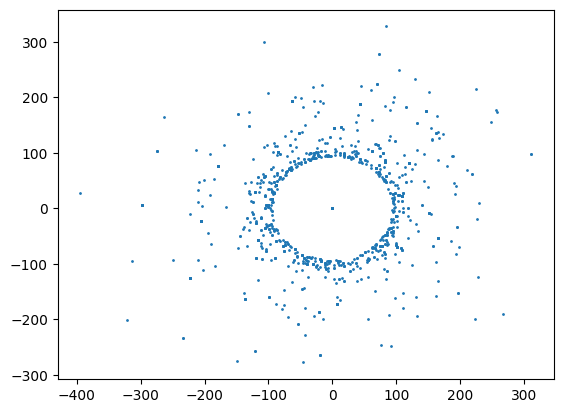

In [7]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots()
for i, batch in enumerate(train_dataloader):
    ax.scatter((batch.x[:,0] * batch.x[:,5]).numpy(), (batch.x[:,1] * batch.x[:,5]).numpy(), s=1)
    print(sum(batch.x[:,4]))
    print(sum(batch["n_pulses"].numpy()))
    if i==0:
        break
fig.show()